# "DataBlocks API - A high level introduction with examples"
> A code-first introduction to fastai's DataBlock API.
- categories: [fastai, DataBlocksAPI, dataload]
- toc: true
- badges: true
- comments: true
- author: Aman Arora

Fastai's very popular Part-1 **Deep Learning for coders** course has begun this week from March 17, 2020. I am honored to be a part of the group that get's to do it "live" before the course get's released to the general public in July.

A high level introduction to the DataBlocks can be found [here](https://muellerzr.github.io/fastblog/datablock/2020/03/21/DataBlockAPI.html) while the official DataBlocks documentation can be referenced [here](http://dev.fast.ai/data.block). 

In general the **DataBlocks API** is an easy-to-use, highly flexible and a very powerful API that can be used to build `DataLoaders` and `Datasets` for various different Deep Learning applications such as **VISION**, **TEXT**, **TABULAR** and **COLLABORATION**. 

> In this post, we will be focussing on **VISION** applications and learn to use the **DataBlocks API** for **5** different vision based single label deep learning applications. 

We will be following the top-down approach as in Fastai and **learn about the DataBlocks API by "doing rather than reading"**. 

We will be using Kaggle for 5 different single label CV applications (each one a little bit different from the other) and build a **DataBlock** for each of these competitions. In this post the focus will be on getting the data in, rather than model training. 
> In the world of deep learning, getting the data ready for training is an essential (usually time consuming) step and we will be focusing on this rather than model training in this blog post by making use of the **DataBlocks** API. 

In [1]:
# using version 0.0.14 of fastai2
import fastai2
from fastai2.vision.all import *
fastai2.__version__, sys.version

('0.0.14',
 '3.6.9 |Anaconda, Inc.| (default, Jul 30 2019, 19:07:31) \n[GCC 7.3.0]')

## Example-1: MNIST 
> The dataset for this example consists of image files that are split by folders. Example referenced from the fastai documentation [here](https://github.com/fastai/fastai2/blob/master/nbs/50_tutorial.datablock.ipynb).

Let's start with the hello-world example of deep learning for handwritten digit classification. We will be building the DataBlocks API for a smaller version of this dataset but this will also hold for the complete version.

In [2]:
path = untar_data(URLs.MNIST_TINY)

In [3]:
# !sudo apt-get install tree
!tree -d {path}

/home/ubuntu/.fastai/data/mnist_tiny
├── models
├── test
├── train
│   ├── 3
│   └── 7
└── valid
    ├── 3
    └── 7

8 directories


As we can see from the folder structure above, we have `train`, `test` and `valid` folders. Each of `train` and `valid` folders have `3` and `7` subfolders with images while `test` consists of some image files. 

In [4]:
files = get_image_files(path)

`get_image_files` is a convenience function that returns the paths of all image files that are available inside the `path` tree passed as an argument.

In [5]:
files

(#1428) [Path('/home/ubuntu/.fastai/data/mnist_tiny/valid/7/7565.png'),Path('/home/ubuntu/.fastai/data/mnist_tiny/valid/7/7445.png'),Path('/home/ubuntu/.fastai/data/mnist_tiny/valid/7/9169.png'),Path('/home/ubuntu/.fastai/data/mnist_tiny/valid/7/7924.png'),Path('/home/ubuntu/.fastai/data/mnist_tiny/valid/7/7197.png'),Path('/home/ubuntu/.fastai/data/mnist_tiny/valid/7/7300.png'),Path('/home/ubuntu/.fastai/data/mnist_tiny/valid/7/9024.png'),Path('/home/ubuntu/.fastai/data/mnist_tiny/valid/7/9816.png'),Path('/home/ubuntu/.fastai/data/mnist_tiny/valid/7/7180.png'),Path('/home/ubuntu/.fastai/data/mnist_tiny/valid/7/9515.png')...]

As a general concept, we need to tell the DataBlock API 4 things: 
1. What kind of problem we're working on? 
2. How to get the items? 
3. How to label the items? 
4. How to create the validation set?

In [6]:
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock), 
                   get_items=get_image_files, 
                   get_y=parent_label, 
                   splitter=GrandparentSplitter())

As a DataBlock introduction, the four things that we pass to build our `DataBlock` object are: 

1. **blocks**: Generally, two blocks are always passed for each different example - one, for the `X` and another for the `y` variable. Since, in this case, our `X`s are images, the `X` block becomes `ImageBlock` and since this is single category classification, our `y` block becomes `CategoryBlock`. 

2. **get_items**: Next, we need to pass a function to the API that get's applied on the `source` passed to the `dblock.dataloaders(source)` method. 

In [7]:
files = get_image_files(path); 
files

(#1428) [Path('/home/ubuntu/.fastai/data/mnist_tiny/valid/7/7565.png'),Path('/home/ubuntu/.fastai/data/mnist_tiny/valid/7/7445.png'),Path('/home/ubuntu/.fastai/data/mnist_tiny/valid/7/9169.png'),Path('/home/ubuntu/.fastai/data/mnist_tiny/valid/7/7924.png'),Path('/home/ubuntu/.fastai/data/mnist_tiny/valid/7/7197.png'),Path('/home/ubuntu/.fastai/data/mnist_tiny/valid/7/7300.png'),Path('/home/ubuntu/.fastai/data/mnist_tiny/valid/7/9024.png'),Path('/home/ubuntu/.fastai/data/mnist_tiny/valid/7/9816.png'),Path('/home/ubuntu/.fastai/data/mnist_tiny/valid/7/7180.png'),Path('/home/ubuntu/.fastai/data/mnist_tiny/valid/7/9515.png')...]

As can be seen from above example, **get_image_files** returns a `L` (similar but more powerful than the Python `List` in fastai) of `items` which are Paths to various image files.

3. **get_y**: The `get_y` function get's applied to each of the files returned after `get_items` is applied to `source`. This function returns the `y` variable from these paths. In our case, we pass the `parent_label` which returns the parent label of a function (the folder name) which becomes the `y` variable. This works because of the way our data is set up. 

4. **splitter**: The last thing that we pass to the DataBlocks API is a **splitter**. The `splitter` get's applied to each of the items returned by `get_items` function to split the data into `train` and `valid` set. Since, our data is already split into train and valid folders, we pass `GrandParentSplitter` as the splitter function which splits the data into train and valid based on grand parent folder name. 

In [8]:
dls = dblock.dataloaders(path)

In [9]:
dls.train_ds[0]

(PILImage mode=RGB size=28x28, TensorCategory(1))

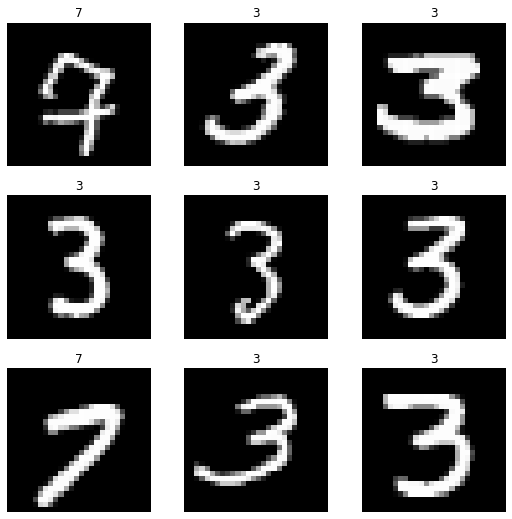

In [10]:
dls.show_batch()

## Example-2: PETS 
> All images for the PETS dataset exist in a single directory but the labels can be extracted fro filenames themselves. Example referenced from the fastai documentation [here](https://github.com/fastai/fastai2/blob/master/nbs/50_tutorial.datablock.ipynb).

In [11]:
path = untar_data(URLs.PETS)/'images'; path

Path('/home/ubuntu/.fastai/data/oxford-iiit-pet/images')

In [12]:
# !sudo apt-get install tree
!tree -d {path}

/home/ubuntu/.fastai/data/oxford-iiit-pet/images

0 directories


Since, we have 0 directories, it means all image files are part of this one directory `/home/ubuntu/.fastai/data/oxford-iiit-pet/images`. This `path` might be different on your machine.. 

Also, the `y` labels need to be extracted from the image names themselves. This is different from the folder structure that we saw in `MNIST`.

In [13]:
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock), 
                   item_tfms=RandomResizedCrop(size=(224,224)),
                   get_items=get_image_files, 
                   get_y=[attrgetter("name"), RegexLabeller(pat=r'^(.*)_\d+.jpg$')], 
                   splitter=RandomSplitter())

Because the objective here is to do single label classification again, therefore, we pass the `ImageBlock` and `CategoryBlock` as the `X` and `y` block again. 

We also pass `item_tfms` which randomly crops and resizes each of the images to a `224*224` size. We need this for model training - in deep learning, we require that our image sizes are the same. As the name suggests `item_tfms` get applied to each `X` item, therefore, each image is randomly cropped and resized to `224*224`.

Our `get_items` function is the same as before. 

For `get_y` since, we need to extract images from the Path, first we get the `name` attribute of each of the paths returned by `get_items`, next we use a `RegexLabeller` to extract the label from the names. 

In [14]:
files = get_image_files(path)
files[:10]

(#10) [Path('/home/ubuntu/.fastai/data/oxford-iiit-pet/images/keeshond_34.jpg'),Path('/home/ubuntu/.fastai/data/oxford-iiit-pet/images/Siamese_178.jpg'),Path('/home/ubuntu/.fastai/data/oxford-iiit-pet/images/german_shorthaired_94.jpg'),Path('/home/ubuntu/.fastai/data/oxford-iiit-pet/images/Abyssinian_92.jpg'),Path('/home/ubuntu/.fastai/data/oxford-iiit-pet/images/basset_hound_111.jpg'),Path('/home/ubuntu/.fastai/data/oxford-iiit-pet/images/Russian_Blue_194.jpg'),Path('/home/ubuntu/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_91.jpg'),Path('/home/ubuntu/.fastai/data/oxford-iiit-pet/images/Persian_69.jpg'),Path('/home/ubuntu/.fastai/data/oxford-iiit-pet/images/english_setter_33.jpg'),Path('/home/ubuntu/.fastai/data/oxford-iiit-pet/images/Russian_Blue_155.jpg')]

In [15]:
names = files[:10].attrgot("name")
names

(#10) ['keeshond_34.jpg','Siamese_178.jpg','german_shorthaired_94.jpg','Abyssinian_92.jpg','basset_hound_111.jpg','Russian_Blue_194.jpg','staffordshire_bull_terrier_91.jpg','Persian_69.jpg','english_setter_33.jpg','Russian_Blue_155.jpg']

In [16]:
labeller = RegexLabeller(pat=r'^(.*)_\d+.jpg$')
labels   = names.map(labeller)
labels

(#10) ['keeshond','Siamese','german_shorthaired','Abyssinian','basset_hound','Russian_Blue','staffordshire_bull_terrier','Persian','english_setter','Russian_Blue']

The above three steps explain how we extract labels from our paths that were returned by the `get_items` function. 

In [17]:
dls = dblock.dataloaders(path)

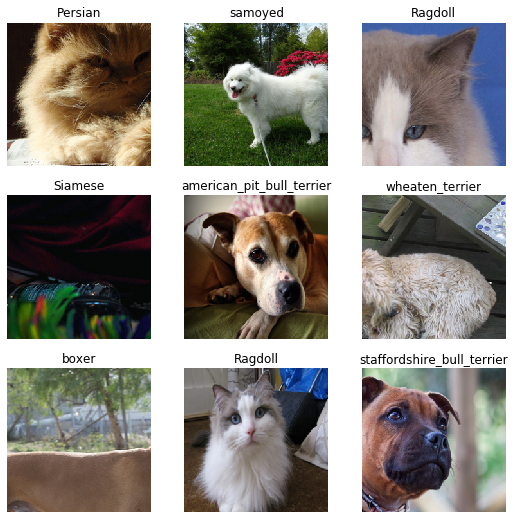

In [18]:
dls.show_batch()

## Example-3: Google Landmark
> Google Landmark Recognition 2019 [kaggle competition](https://www.kaggle.com/c/landmark-recognition-2019) to predict the landmark shown in the image. 

Since the complete dataset size for this competition is around 100 gb, we will only be working on a subset of the dataset. 

In [19]:
path = download_data("https://s3.amazonaws.com/google-landmark/train/images_000.tar")
path

Path('/home/ubuntu/.fastai/archive/images_000.tar')

So the `.tar` file get's downloaded at `home/ubuntu/.fastai/archive/images_000.tar` at my machine. `download_data` is a convenience function inside fastai and more about it can be found [here](http://dev.fast.ai/data.external#download_data).

In [20]:
#untar file
!tar -xf {path} 

In [21]:
!tree -d {path.parent/'0'}

/home/ubuntu/.fastai/archive/0
└── 0
    ├── 0
    ├── 1
    ├── 2
    ├── 3
    ├── 4
    ├── 5
    ├── 6
    ├── 7
    └── 8

10 directories


In this competition, all images are present in the path (similar to PETS) but the labels are provided in a `.csv` file. This is different from PETS where we built the labels from the path names themselves. 

Let's download that file. From the competition information available [here](https://github.com/cvdfoundation/google-landmark#download-train-set) the train `.csv` file can be downloaded from `https://s3.amazonaws.com/google-landmark/metadata/train.csv`. 

In [22]:
trn_csv_pth = download_data("https://s3.amazonaws.com/google-landmark/metadata/train.csv")
trn_csv_pth

Path('/home/ubuntu/.fastai/archive/train.csv')

In [23]:
trn_labels = pd.read_csv(trn_csv_pth)
trn_labels.head()

,id,url,landmark_id
0,6e158a47eb2ca3f6,https://upload.wikimedia.org/wikipedia/commons/b/b5/Observatoriet_v%C3%A4derkammer_2013a.jpg,142820
1,202cd79556f30760,http://upload.wikimedia.org/wikipedia/commons/6/63/Ecosse200996-1.jpg,104169
2,3ad87684c99c06e1,http://upload.wikimedia.org/wikipedia/commons/2/2c/Pirmasens_Dynamikum.jpg,37914
3,e7f70e9c61e66af3,https://upload.wikimedia.org/wikipedia/commons/0/02/Occidental_Vertical.jpg,102140
4,4072182eddd0100e,https://upload.wikimedia.org/wikipedia/commons/5/51/Looking_downstream_from_the_footbridge_over_the_Severn_-_geograph.org.uk_-_532337.jpg,2474


Since we don't need the `url` column, let's drop it. 

In [24]:
trn_labels.drop("url", axis=1, inplace=True)

So in this competition, the images are named as `id`.jpg from the dataframe above and the `labels` are inside the `df` as well. This is different from both the PETS and MNIST data structure. 

In [25]:
files = get_image_files(path.parent/'0')

In [26]:
files

(#8266) [Path('/home/ubuntu/.fastai/archive/0/0/5/00562e33f481adc5.jpg'),Path('/home/ubuntu/.fastai/archive/0/0/5/0054a9a95ff4190c.jpg'),Path('/home/ubuntu/.fastai/archive/0/0/5/0054318893cd2ea8.jpg'),Path('/home/ubuntu/.fastai/archive/0/0/5/0059b37f9ea1e443.jpg'),Path('/home/ubuntu/.fastai/archive/0/0/5/00509f87e2140fe8.jpg'),Path('/home/ubuntu/.fastai/archive/0/0/5/0059cc88f2dbb53a.jpg'),Path('/home/ubuntu/.fastai/archive/0/0/5/005303e80b4f14a2.jpg'),Path('/home/ubuntu/.fastai/archive/0/0/5/0050051bd1831856.jpg'),Path('/home/ubuntu/.fastai/archive/0/0/5/00575e870647b87c.jpg'),Path('/home/ubuntu/.fastai/archive/0/0/5/005959682da86fa8.jpg')...]

So now we have a list of 8266 image files and since this is only a subset of the dataset, we need to only keep those rows in the `trn_labels` dataframe for which we have images. The following step wouldn't be necessary if you're working with the complete dataset.

In [27]:
fnames = files.attrgot('stem')
fnames

(#8266) ['00562e33f481adc5','0054a9a95ff4190c','0054318893cd2ea8','0059b37f9ea1e443','00509f87e2140fe8','0059cc88f2dbb53a','005303e80b4f14a2','0050051bd1831856','00575e870647b87c','005959682da86fa8'...]

In [28]:
trn_labels = trn_labels[trn_labels["id"].isin(fnames)].reset_index(drop=True)
trn_labels.set_index("id", inplace=True)
trn_labels.head()

,landmark_id
id,
0036d78c05c194d9,50089
001cd787f1e9a803,61937
00429b0a692bc6ec,183170
0082fd4214b3c2c7,36407
002b386016930458,119649


Now we are ready to create our `DataBlock` object. 

In [29]:
def get_label_from_df(path, df=trn_labels):
    id = path.stem
    return df.loc[id].values[0]

In [30]:
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock), 
                   item_tfms = RandomResizedCrop(size=(224,224)),
                   get_items=get_image_files, 
                   get_y=get_label_from_df, 
                   splitter=RandomSplitter())

In [31]:
dls = dblock.dataloaders(path.parent/'0')

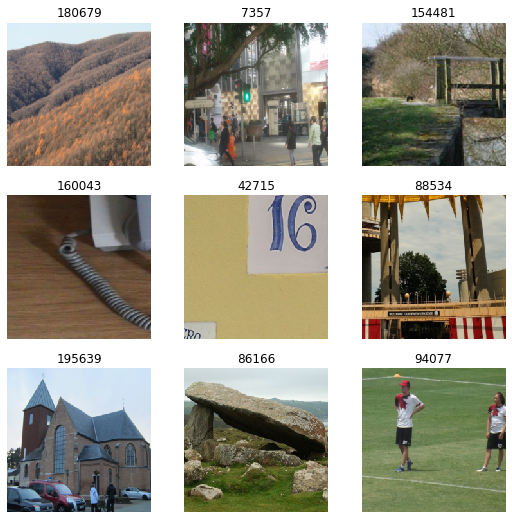

In [32]:
dls.show_batch()

## Example-4: Distracted Driver Detection
>In this competition you are given driver images, each taken in a car with a driver doing something in the car (texting, eating, talking on the phone, makeup, reaching behind, etc). Your goal is to predict the likelihood of what the driver is doing in each picture. 

In [33]:
data_path = Path("/home/ubuntu/repos/kaggle/driver/data/")

In [34]:
!tree -d {data_path}

/home/ubuntu/repos/kaggle/driver/data
└── imgs
    ├── test
    └── train
        ├── c0
        ├── c1
        ├── c2
        ├── c3
        ├── c4
        ├── c5
        ├── c6
        ├── c7
        ├── c8
        └── c9

13 directories


All images are split into folders similar to the PETS data structure. But, for this type of competition, we won't be using the **DataBlocks API** similar to PETS. The reason wil be explained in a moment. 

We will use the same `get_image_files` as before, to read in the files from the `data_path`.

In [35]:
files = get_image_files(data_path/"imgs")

In [36]:
files

(#102150) [Path('/home/ubuntu/repos/kaggle/driver/data/imgs/test/img_31511.jpg'),Path('/home/ubuntu/repos/kaggle/driver/data/imgs/test/img_63076.jpg'),Path('/home/ubuntu/repos/kaggle/driver/data/imgs/test/img_27600.jpg'),Path('/home/ubuntu/repos/kaggle/driver/data/imgs/test/img_31852.jpg'),Path('/home/ubuntu/repos/kaggle/driver/data/imgs/test/img_98339.jpg'),Path('/home/ubuntu/repos/kaggle/driver/data/imgs/test/img_68938.jpg'),Path('/home/ubuntu/repos/kaggle/driver/data/imgs/test/img_85715.jpg'),Path('/home/ubuntu/repos/kaggle/driver/data/imgs/test/img_41593.jpg'),Path('/home/ubuntu/repos/kaggle/driver/data/imgs/test/img_78475.jpg'),Path('/home/ubuntu/repos/kaggle/driver/data/imgs/test/img_99303.jpg')...]

Also, an interesting thing here is that we have around ~20K train images while we have ~80K test images.

Similar to the **Google Landmark Images** competition from before, the labels are given in a dataframe while the images are available in the `train` folder. We will build the **DataBlocks API** a little differently than we did in the last competition. This time we will instead use the pandas dataframe, to `get_x` and `get_y` labels. 

We use the dataframe instead of splitting by folders, because with the dataframe we can pass the `valid_idx` values (index values for the validation set). From the Kaggle competition [here](https://www.kaggle.com/c/state-farm-distracted-driver-detection/data) we can see that the `test` set consists of driver images of those drivers that were not part of the train set. 

Therefore, we would like our `validation` set to consist of drivers not part of the `train` set as well. This is possible by passing in validation index values such that `subject` in the train dataframe are different in validation set from those in train set. 

In [37]:
trn_labels = pd.read_csv(data_path/"driver_imgs_list.csv")
trn_labels.head()

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


In [38]:
def get_paths_from_df(df_values):
    path = Path(data_path)/"imgs"/"train"/df_values[1]/df_values[2]
    return PILImage.create(path)

In this competition, the idea is to predict the `classname` rather than the `subject` so we will use this as our `y_label`. 

In [39]:
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   item_tfms=RandomResizedCrop(size=(224,224)), 
                   get_x=get_paths_from_df,
                   splitter=IndexSplitter(trn_labels[-1983:].index),
                   get_y=ColReader(1)
                  )        

The **DataBlock API** is built differently than the Google Landmark Detection challenge where we used a RandomSplitter, got our `X`s from paths, while `y`s from dataframe. 

Instead, in this competition, we use an `IndexSplitter` to make sure that the `valid` set consists of drivers not part of `train` set. 

We also use `get_paths_from_df` as our `get_x`. Essentially, all that this function does is to generate a path of our image based on the `trn_labels` dataframe values. Once we get the path from `get_x`, we use `PILImage.create` method to return a PIL Image. This image becomes our `X`. 

To get the `y` variable we simply read the **"classname"** column of the dataframe. 

In [40]:
dls = dblock.dataloaders(trn_labels.values)

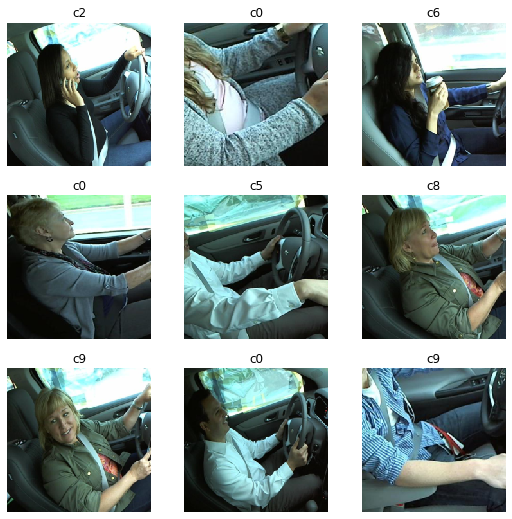

In [41]:
dls.show_batch()

Now, getting these `c0`, `c1` class names are not very helpful. Let's instead get the actual image captions. We can do this by simply adding a `get_true_label` function which returns the true label based on a dictionary defined in the Kaggle competition. 

In [42]:
def get_true_label(key):
    return dict(
        c0= 'safe driving',
        c1= 'texting - right',
        c2= 'talking on the phone - right',
        c3= 'texting - left',
        c4= 'talking on the phone - left',
        c5= 'operating the radio',
        c6= 'drinking',
        c7= 'reaching behind',
        c8= 'hair and makeup',
        c9= 'talking to passenger'
    )[key]

In [43]:
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   item_tfms=RandomResizedCrop(size=(256, 256)), 
                   get_x=get_paths_from_df,
                   splitter=IndexSplitter(trn_labels[-1983:].index),
                   get_y=[ColReader(1), get_true_label]
                  )        

We add the `get_true_label` function to the `get_y` and now the `get_y` becomes a list of functions which will be applied serially. The first function `ColReader(1)` will read the second column and return the **"classname"** such as `c0`, `c1`.. and next, `get_true_label` will return a true label based on the dictionary and key. The key passed to `get_true_label` is the output of `ColReader(1)` therefore, one of `c0`, `c1`, `c2`..

Let's build the DataBlock object again and check the dataloader batch. 

In [44]:
dls = dblock.dataloaders(trn_labels.values)

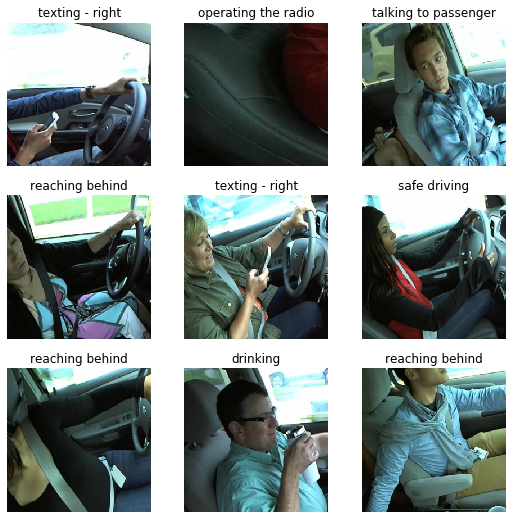

In [45]:
dls.show_batch()

## Example-5: Plant Pathology 2020 - FGVC7
>Given a photo of an apple leaf, can you accurately assess its health? This competition will challenge you to distinguish between leaves which are healthy, those which are infected with apple rust, those that have apple scab, and those with more than one disease.

In [46]:
data_path = Path("/home/ubuntu/repos/kaggle/plant/data/")

In [47]:
!tree -d {data_path}

/home/ubuntu/repos/kaggle/plant/data
└── images

1 directory


All images are inside the `images` directory. Let's use the `get_image_files` function to have a look at them. 

In [48]:
files = get_image_files(data_path/'images')
files

(#3642) [Path('/home/ubuntu/repos/kaggle/plant/data/images/Test_116.jpg'),Path('/home/ubuntu/repos/kaggle/plant/data/images/Test_542.jpg'),Path('/home/ubuntu/repos/kaggle/plant/data/images/Test_798.jpg'),Path('/home/ubuntu/repos/kaggle/plant/data/images/Train_159.jpg'),Path('/home/ubuntu/repos/kaggle/plant/data/images/Test_61.jpg'),Path('/home/ubuntu/repos/kaggle/plant/data/images/Test_713.jpg'),Path('/home/ubuntu/repos/kaggle/plant/data/images/Test_1387.jpg'),Path('/home/ubuntu/repos/kaggle/plant/data/images/Train_556.jpg'),Path('/home/ubuntu/repos/kaggle/plant/data/images/Test_551.jpg'),Path('/home/ubuntu/repos/kaggle/plant/data/images/Train_499.jpg')...]

Each label path name consists of `Test` or `Train` labels (which we can use for splitting). The `Test` files do not have any labels because this the test set on which we need to submit predictions to Kaggle. 

Therefore, we can use the `Train` set to read images, do a random split using the `RandomSpliter()` to create a random `valid` dataset and finally run predictions on the `test` set.

In [49]:
trn_labels = pd.read_csv(data_path/"train.csv")
trn_labels.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


Also, the labels are one-hot encoded inside the DataFrame. 

In [50]:
cats = [np.where(r==1)[0][0] for r in trn_labels[['healthy', 'multiple_diseases', 'rust', 'scab']].values]
trn_labels['cat'] = cats

In [51]:
def get_true_label(key):
    return {
    0: 'healthy',
    1: 'multiple_diseases', 
    2: 'rust', 
    3: 'scab'
    }[key]

In [52]:
def get_paths_from_df(df_values):
    return f"{data_path/'images'/df_values[0]}.jpg"

In [53]:
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   item_tfms=RandomResizedCrop(size=(224, 224)), 
                   get_x=get_paths_from_df,
                   splitter=RandomSplitter(),
                   get_y=[ColReader(5), get_true_label]
                  )        

In [54]:
dls = dblock.dataloaders(trn_labels.values)

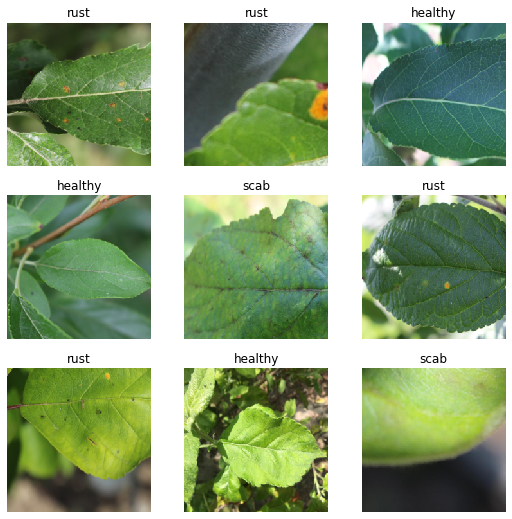

In [55]:
dls.show_batch()

# Summary

So, in this post, we specifically looked at single image, single label type Vision Classification problems and looked at different ways of using the **DataBlocks API** to build the DataBlock object and dataloaders. 

In the coming few days, we will look at the **DataBlocks API** in more detail, use the same API structure to build `dataloaders` for Single Image, Multi Label type classification, text classification and also look at an interesting example on how to deal with Multi Image, Single Label classification type problem.

In the future posts, we will also start digging deeper in to the implementation details of the **DataBlocks API** and the [fastai](https://github.com/fastai/fastai2) library as a whole. 